In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [1,225 kB]
Get:15 http://ar

In [0]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f9985328b00>)

In [0]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [5]:
len(train_data)

150000

In [6]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
len(test_data)

50000

In [8]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [9]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [0]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [11]:
len(train_data)

146183

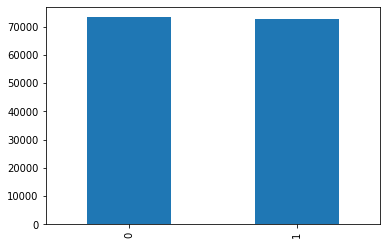

In [12]:
train_data['label'].value_counts().plot(kind='bar')

In [13]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,73342
1,1,72841


In [14]:
train_data.isnull().values.any()

True

In [15]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [16]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [17]:
train_data = train_data.dropna(how='any')
train_data.isnull().values.any()

False

In [18]:
len(train_data)

146182

In [19]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')
train_data[:5]

,id,document,label
0,9976970,아더빙진짜짜증나네요목소리,0
1,3819312,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소이야기구먼솔직히재미는없다평점조정,0
4,6483659,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1


In [20]:
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

id            0
document    789
label         0
dtype: int64

In [21]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [22]:
train_data = train_data.dropna(how = 'any')
len(train_data)

145393

In [23]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]','')
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
len(test_data)

48852

In [0]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [25]:
okt = Okt()
okt.morphs('무비가 아주 좋네요 이런영화 또 나왔으면 좋겠어요!!', stem=True)

['무비', '가', '아주', '좋다', '이런', '영화', '또', '나오다', '좋다', '!!']

In [0]:
X_train = []
for sentence in train_data['document']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)
  temp_X = [word for word in temp_X if not word in stopwords]
  X_train.append(temp_X)

In [27]:
X_train[:3]

[['아더', '빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [0]:
X_test = []
for sentence in test_data['document']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)
  temp_X = [word for word in temp_X if not word in stopwords]
  X_test.append(temp_X)

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [30]:
tokenizer.word_index

{'영화': 1,
 '보다': 2,
 '을': 3,
 '없다': 4,
 '이다': 5,
 '좋다': 6,
 '다': 7,
 '너무': 8,
 '하': 9,
 '정말': 10,
 '재밌다': 11,
 '적': 12,
 '되다': 13,
 '같다': 14,
 '있다': 15,
 '만': 16,
 '진짜': 17,
 '않다': 18,
 '로': 19,
 '아니다': 20,
 '에서': 21,
 '내': 22,
 '평점': 23,
 '그': 24,
 '최고': 25,
 '인': 26,
 '나': 27,
 '연기': 28,
 '생각': 29,
 '스토리': 30,
 '점': 31,
 '게': 32,
 '이영화': 33,
 '드라마': 34,
 '감동': 35,
 '사람': 36,
 '만들다': 37,
 '고': 38,
 '요': 39,
 '나오다': 40,
 '아깝다': 41,
 '이런': 42,
 '지': 43,
 'ㅋㅋ': 44,
 '보고': 45,
 '재미있다': 46,
 '배우': 47,
 '왜': 48,
 '감독': 49,
 '때': 50,
 '네': 51,
 '들다': 52,
 '하고': 53,
 '그냥': 54,
 '아': 55,
 '재미없다': 56,
 '시간': 57,
 '까지': 58,
 '못': 59,
 '중': 60,
 '것': 61,
 '지루하다': 62,
 '뭐': 63,
 '가다': 64,
 '재미': 65,
 '쓰레기': 66,
 '말': 67,
 '면': 68,
 '주다': 69,
 '본': 70,
 '모르다': 71,
 '작품': 72,
 '알다': 73,
 '더': 74,
 '오다': 75,
 '거': 76,
 '자다': 77,
 '그렇다': 78,
 '사랑': 79,
 '마지막': 80,
 '저': 81,
 '대': 82,
 '정도': 83,
 '화': 84,
 'ㅠㅠ': 85,
 '이나': 86,
 '많다': 87,
 '완전': 88,
 'ㅋㅋㅋ': 89,
 '처음': 90,
 '라': 91,
 'ㅋ': 92,
 '안되다': 93,

In [31]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 46503
등장 빈도가 2번 이하인 희귀 단어의 수: 25474
단어 집합에서 희귀 단어의 비율: 54.77926155301809
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9761734039734433


In [0]:
vocab_size = total_cnt - rare_cnt +1

In [0]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [34]:
X_train[:3]

[[9879, 11447, 17, 249, 661],
 [1062, 468, 45, 605, 1, 407, 1509, 28, 1077, 680, 18],
 [214, 1719, 569, 3848, 2, 226, 7]]

In [0]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [0]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [37]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

48721
48721


리뷰의 최대 길이 :  68
리뷰의 평균 길이 :  10.73779342884458


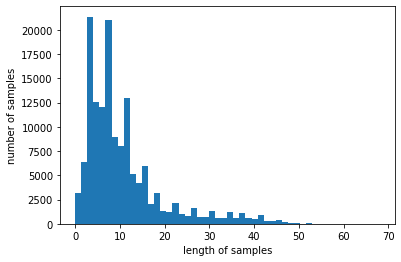

In [38]:
print('리뷰의 최대 길이 : ', max(len(l) for l in X_train))
print('리뷰의 평균 길이 : ', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
      cnt = cnt+1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt/ len(nested_list))*100))

In [40]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.41032236765182


In [0]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [0]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [45]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
1938/1939 [============================>.] - ETA: 0s - loss: 0.3940 - acc: 0.8195
Epoch 00001: val_acc improved from -inf to 0.83686, saving model to best_model.h5
1939/1939 [==============================] - 24s 12ms/step - loss: 0.3940 - acc: 0.8195 - val_loss: 0.3682 - val_acc: 0.8369
Epoch 2/15
1935/1939 [============================>.] - ETA: 0s - loss: 0.3316 - acc: 0.8555
Epoch 00002: val_acc improved from 0.83686 to 0.85103, saving model to best_model.h5
1939/1939 [==============================] - 23s 12ms/step - loss: 0.3316 - acc: 0.8555 - val_loss: 0.3386 - val_acc: 0.8510
Epoch 3/15
1939/1939 [==============================] - ETA: 0s - loss: 0.3053 - acc: 0.8696
Epoch 00003: val_acc improved from 0.85103 to 0.85508, saving model to best_model.h5
1939/1939 [==============================] - 23s 12ms/step - loss: 0.3053 - acc: 0.8696 - val_loss: 0.3373 - val_acc: 0.8551
Epoch 4/15
1936/1939 [============================>.] - ETA: 0s - loss: 0.2839 - acc: 0.8819
E

In [58]:
review = ["짱 재밌어요!"]
#tokenizer.fit_on_texts(review)

review_sequence = tokenizer.texts_to_sequences(review)
review_sequence_pad = pad_sequences(review_sequence, maxlen = max_len)
model.predict(review_sequence_pad)

array([[0.9703428]], dtype=float32)

In [53]:
review_sequence

[[17, 8]]